In [1]:
using CSV, Plots, Random, LinearAlgebra, Statistics, DataFrames, ARFIMA

In [2]:
sentiment = CSV.read("sentiment1.csv")

,TotalSentimentScore,Vaccine,Death,Shut,Date
,Float64,Int64,Int64,Int64,String
1,0.0858615,0,0,0,02/11/2020
2,-0.0980214,2,3,1,02/12/2020
3,-0.0931667,0,3,0,02/13/2020
4,0.00919,0,1,2,02/14/2020
5,0.0,1,0,0,02/15/2020
6,-0.1998,0,0,1,02/16/2020
7,-0.190725,1,0,0,02/17/2020
8,-0.0343133,0,2,0,02/18/2020
9,-0.144262,0,0,0,02/19/2020


In [19]:
stock = CSV.read("Anthem.csv",header = false)

,Column1
,Float64
1,279.91
2,296.0
3,298.87
4,297.82
5,298.978
6,300.135
7,301.293
8,302.45
9,304.06


In [20]:
# index for 5-fold
split = [43,43 + 44,43+ 44*2,43 + 44*3, 43 + 44*4,43 + 44*5]

6-element Array{Int64,1}:
  43
  87
 131
 175
 219
 263

In [24]:
stock[1]

263-element Array{Float64,1}:
 279.910004
 296.0
 298.869995
 297.820007
 298.9775083
 300.1350095
 301.2925108
 302.450012
 304.059998
 293.940002
 294.709991
 288.9733273
 283.2366637
   ⋮
 292.209991
 291.190002
 296.160004
 305.170013
 310.76001
 307.0900067
 303.4200033
 299.75
 298.880005
 285.799988
 273.26001
 272.799988

In [22]:
function abs_err(y,pred)
    return mean(abs.(y-pred))
end

abs_err (generic function with 1 method)

In [91]:
num_of_model = 3
mse = zeros(num_of_model,5)
w = zeros(18)
for i in 1:5
    w_set = []
    # setting train and validation set
    split_cur = split[i]
    split2 = Int(round(split_cur*4/5))
        
    stock_train = stock[1][1:split2]
    stock_val = stock[1][split2 + 1:split_cur]
        
    sent_train = sentiment[1][1:split2]
    sent_val = sentiment[1][split2 + 1:split_cur]
        
    death_train = sentiment[3][1:split2]
    death_val = sentiment[3][split2 + 1:split_cur]
        
    vac_train = sentiment[2][1:split2]
    vac_val = sentiment[2][split2 + 1:split_cur]
        
    shut_train = sentiment[4][1:split2]
    shut_val = sentiment[4][split2 + 1:split_cur]
    
    #Naive Model, w[1:5]
    Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
    Xval = [sent_val death_val vac_val shut_val ones(length(sent_val))]
    Ytrain = stock_train
    Yval = stock_val
    
    w_cur = Xtrain\Ytrain
    w_set = vcat(w_set, w_cur)
    pred = Xval*w_cur
    mse[1,i] = abs_err(Yval,pred)
    
    #AR1 Model, w[6:11]
    Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(sent_train)-1)]
    Xval = [sent_val[2:end] stock_val[1:end-1] death_val[2:end] vac_val[2:end] shut_val[2:end] ones(length(sent_val)-1)]
    Ytrain = stock_train[2:end]
    Yval = stock_val[2:end]
    
    w_cur = Xtrain\Ytrain
    w_set = vcat(w_set, w_cur)
    pred = Xval*w_cur
    mse[2,i] = abs_err(Yval,pred)
    
    # AR2 Model, w[12:18]
    Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
    Xval = [sent_val[3:end] stock_val[2:end-1] stock_val[1:end-2] death_val[3:end] vac_val[3:end] shut_val[3:end] ones(length(sent_val)-2)]
    Ytrain = stock_train[3:end]
    Yval = stock_val[3:end]
    
    w_cur = Xtrain\Ytrain
    w_set = vcat(w_set, w_cur)
    pred = Xval*w_cur
    mse[3,i] = abs_err(Yval,pred)
    w = hcat(w,w_set)
end
w = w[:,2:6]

18×5 Array{Any,2}:
 -41.0863    -72.6368     -60.825      -57.3763    -44.9457
  -1.27415    -1.67175     -1.36378     -1.30473    -1.235
  -0.717599   -1.11343      0.824359     0.474992   -0.0328206
  -2.23546    -3.51709     -3.42203     -3.52183    -3.28443
 283.844     279.604      281.103      283.482     283.589
 -58.7764    -49.3443     -42.4971     -22.1353    -16.8618
   0.798971    0.917244     0.94198      0.932849    0.926236
   0.425684    0.14459      0.119088     0.144864    0.123007
   2.58301    -0.796817    -0.219538    -0.287652   -0.0710162
  -1.76057    -0.295788    -0.207644    -0.317783   -0.382502
  50.9202     18.5899      12.4788      16.9648     19.2438
 -51.3606    -44.1143     -38.2162     -19.3594    -14.5296
   0.637825    0.840094     0.860508     0.843534    0.855381
   0.233002    0.0923892    0.0947904    0.103499    0.0810018
   0.744642    0.231554     0.190977     0.218054    0.179482
   1.84023    -0.924623    -0.282466    -0.341573   -0.0779934


In [92]:
mse

3×5 Array{Float64,2}:
 51.9352  28.0873   13.6328   9.45674  9.12706
 18.501    6.01871   5.02105  3.52973  3.36717
 17.9895   5.52168   4.81623  3.65989  3.3327

In [93]:
avg_mse = mean(mse, dims=2)

3×1 Array{Float64,2}:
 22.44780794130933
  7.287525197851982
  7.0639976249576435

In [106]:
final_model = findmin(avg_mse)[2][1]
test_mse = zeros(5)
model = ["model 1", "model 2", "model 3"]
model_length = [5, 6, 7]
fig = plot(linestyle = :dot, title = "Test predictions from 9/17 to 10/30")
w_test = zeros(model_length[final_model])
for i in 1:5
    #Fixed index
    stock_train = stock[1][1:split[i]]
    sent_train = sentiment[1][1:split[i]]
    death_train = sentiment[3][1:split[i]]
    vac_train = sentiment[2][1:split[i]]
    shut_train = sentiment[4][1:split[i]]
    
    stock_test = stock[1][split[i]+1:split[i+1]]
    sent_test = sentiment[1][split[i]+1:split[i+1]]
    death_test = sentiment[3][split[i]+1:split[i+1]]
    vac_test = sentiment[2][split[i]+1:split[i+1]]
    shut_test = sentiment[4][split[i]+1:split[i+1]]
    
    if final_model == 1
        Xtrain = [sent_train death_train vac_train shut_train ones(length(sent_train))]
        Xtest = [sent_test death_test vac_test shut_test ones(length(sent_test))]
        Ytrain = stock_train
        Ytest = stock_test
    
        w_cur = Xtrain\Ytrain
        w_test = hcat(w_test, w_cur)
        pred = Xtest*w_cur
        test_mse[i] = abs_err(Ytest,pred)
        #plot
        if i == 5
            date = [1:44]
            plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
            plot!(date, pred, color = :blue, label = "Naive Model")
        end
        
    elseif final_model == 2
        Xtrain = [sent_train[2:end] stock_train[1:end-1] death_train[2:end] vac_train[2:end] shut_train[2:end] ones(length(stock_train)-1)]
        Xtest = [sent_test[2:end] stock_test[1:end-1] death_test[2:end] vac_test[2:end] shut_test[2:end] ones(length(stock_test)-1)]
        Ytrain = stock_train[2:end]
        Ytest = stock_test[2:end]
        
        w_cur = Xtrain\Ytrain
        w_test = hcat(w_test, w_cur)
        pred = Xtest*w_cur
        test_mse[i] = abs_err(Ytest,pred)
        #plot
        if i == 5
            date = [3:44]
            plot!(date, Ytest, color = :red,  label = "Actual Stock Price")
            plot!(date, pred, color = :blue, label = "AR1 Model")
        end
        
    elseif final_model == 3
        Xtrain = [sent_train[3:end] stock_train[2:end-1] stock_train[1:end-2] death_train[3:end] vac_train[3:end] shut_train[3:end] ones(length(sent_train)-2)]
        Xtest = [sent_test[3:end] stock_test[2:end-1] stock_test[1:end-2] death_test[3:end] vac_test[3:end] shut_test[3:end] ones(length(stock_test)-2)]
        Ytrain = stock_train[3:end]
        Ytest = stock_test[3:end]
        
        w_cur = Xtrain\Ytrain
        w_test = hcat(w_test, w_cur)
        pred = Xtest*w_cur
        test_mse[i] = abs_err(Ytest,pred) 
        #plot
        if i == 5
            date = [3:44]
            plot!(date, Ytest, color = :red, label = "Actual Stock Price")
            plot!(date, pred, color = :blue, label = "AR2 Model")
        end
    else
        print("error")
    end  
end
w_test = w_test[:,2:6]
print("Selected: ", model[final_model], ", estimated error is: ",mean(test_mse), ", Validation Error is :", findmin(avg_mse)[1])

Selected: model 3, estimated error is: 4.992996840622437, Validation Error is :7.0639976249576435

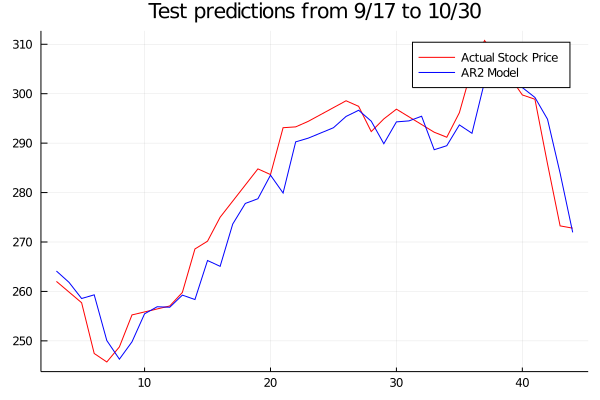

In [103]:
fig

In [104]:
w_test

7×5 Array{Float64,2}:
 -67.0166     -46.7312     -24.7793     -14.5296     -9.14952
   0.688137     0.853174     0.856103     0.855381    0.852926
   0.286554     0.0852341    0.0931144    0.0810018   0.0868488
  -0.202422     0.169806     0.242386     0.179482    0.151732
  -1.28116     -0.425721    -0.361614    -0.0779934   0.0723801
   0.0882025   -0.170094    -0.283482    -0.358565   -0.324431
   0.904596    12.1693      11.5696      16.108      15.297

In [105]:
w

18×5 Array{Any,2}:
 -41.0863    -72.6368     -60.825      -57.3763    -44.9457
  -1.27415    -1.67175     -1.36378     -1.30473    -1.235
  -0.717599   -1.11343      0.824359     0.474992   -0.0328206
  -2.23546    -3.51709     -3.42203     -3.52183    -3.28443
 283.844     279.604      281.103      283.482     283.589
 -58.7764    -49.3443     -42.4971     -22.1353    -16.8618
   0.798971    0.917244     0.94198      0.932849    0.926236
   0.425684    0.14459      0.119088     0.144864    0.123007
   2.58301    -0.796817    -0.219538    -0.287652   -0.0710162
  -1.76057    -0.295788    -0.207644    -0.317783   -0.382502
  50.9202     18.5899      12.4788      16.9648     19.2438
 -51.3606    -44.1143     -38.2162     -19.3594    -14.5296
   0.637825    0.840094     0.860508     0.843534    0.855381
   0.233002    0.0923892    0.0947904    0.103499    0.0810018
   0.744642    0.231554     0.190977     0.218054    0.179482
   1.84023    -0.924623    -0.282466    -0.341573   -0.0779934
